In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta
import calendar

plt.style.use('fivethirtyeight')

In [2]:
df=pd.read_csv("Urbanclap.csv")
df.head()

,Transaction_ID,Profile ID,Date_of_Booking,Date_of_Service_Requested,Source,Slot of Booking (Hour of the Day)
0,BBCHH,1,5/20/2018,5/21/2018,4,14
1,CHWFD,1,9/23/2018,9/23/2018,3,8
2,DYDMF,2,11/10/2018,11/13/2018,3,11
3,EZYSA,3,4/12/2018,4/16/2018,2,8
4,HWAKX,3,8/5/2018,8/6/2018,2,11


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30940 entries, 0 to 30939
Data columns (total 6 columns):
Transaction_ID                       30940 non-null object
Profile ID                           30940 non-null int64
Date_of_Booking                      30940 non-null object
Date_of_Service_Requested            30940 non-null object
Source                               30940 non-null int64
Slot of Booking (Hour of the Day)    30940 non-null int64
dtypes: int64(3), object(3)
memory usage: 1.4+ MB


In [4]:
df.columns=['T_ID','P_ID','DOB','DOSR','Source','Slot']

In [5]:
df['DOB']=pd.to_datetime(df['DOB'])
df['DOSR']=pd.to_datetime(df['DOSR'])

In [6]:
df.sort_values(by='DOB',inplace=True)
df.describe(include='all')

,T_ID,P_ID,DOB,DOSR,Source,Slot
count,30940,30940.000000,30940,30940,30940.000000,30940.000000
unique,30940,NaN,365,370,NaN,NaN
top,OTYAO,NaN,2017-12-01 00:00:00,2018-08-21 00:00:00,NaN,NaN
freq,1,NaN,188,109,NaN,NaN
first,NaN,NaN,2017-12-01 00:00:00,2017-12-01 00:00:00,NaN,NaN
last,NaN,NaN,2018-11-30 00:00:00,2018-12-05 00:00:00,NaN,NaN
mean,NaN,8329.657854,NaN,NaN,2.673142,13.060440
std,NaN,4807.274974,NaN,NaN,1.025224,3.135142
min,NaN,1.000000,NaN,NaN,1.000000,6.000000
25%,NaN,4142.750000,NaN,NaN,2.000000,12.000000


# 1. Data Exploration

In [7]:
print('Unique Customers Count: {}'.format(df['P_ID'].nunique()))

Unique Customers Count: 16711


In [8]:
bookings=pd.DataFrame(df.groupby('DOB')["T_ID"].count())

bookings_df=bookings.resample(rule='M').sum()

bookings_df.reset_index(inplace=True)

bookings_df['month']=bookings_df['DOB'].apply(lambda x:x.month)
bookings_df['month']=bookings_df['month'].apply(lambda x: calendar.month_abbr[x])

bookings_df['year']=bookings_df['DOB'].apply(lambda x:x.year)

bookings_df['mmm-yy']=bookings_df['month'].astype(str)+"-"+bookings_df['year'].astype(str)


bookings_df.head()

,DOB,T_ID,month,year,mmm-yy
0,2017-12-31,2761,Dec,2017,Dec-2017
1,2018-01-31,2675,Jan,2018,Jan-2018
2,2018-02-28,2403,Feb,2018,Feb-2018
3,2018-03-31,2600,Mar,2018,Mar-2018
4,2018-04-30,2483,Apr,2018,Apr-2018


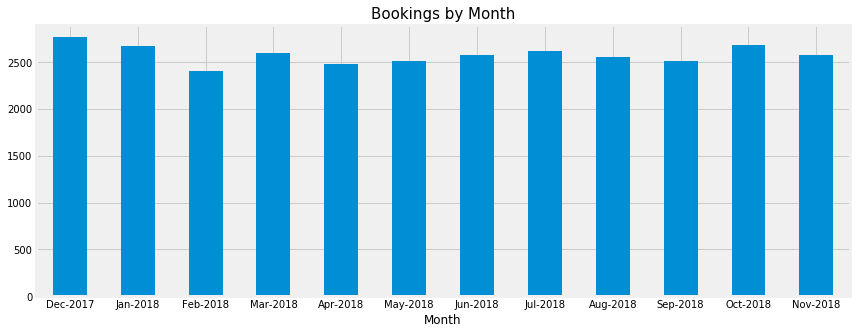

In [22]:
g=bookings_df.plot(x="mmm-yy",y='T_ID',kind="bar",figsize=(13,5),legend=False,fontsize=10,rot=0)
g.set_xlabel('Month',size=12)
g.set_title('Bookings by Month',size=15);

In [17]:
slot=pd.DataFrame(df.groupby('Slot')['T_ID'].count())
slot['Bookings percentage']=slot['T_ID']*100/(slot['T_ID'].sum())
slot.reset_index(inplace=True)
slot.rename(columns= {"T_ID":"Bookings"},inplace=True)
slot.head()

,Slot,Bookings,Bookings percentage
0,6,1193,3.855850
1,7,1232,3.981900
2,8,1318,4.259858
3,9,1358,4.389140
4,10,1289,4.166128


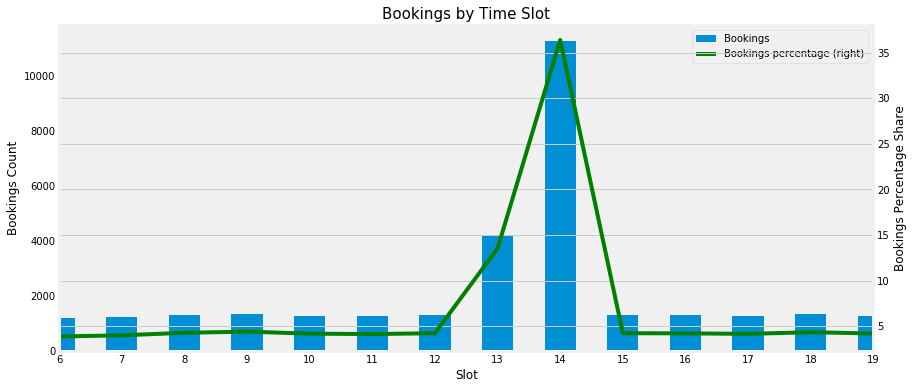

In [20]:
g1=slot.plot(x="Slot", y= 'Bookings',kind='bar',grid=False,fontsize=10, figsize=(13,6));
g1.set_title('Bookings by Time Slot',size=15)
g1.set_ylabel('Bookings Count')


g2=slot.plot(y='Bookings percentage', kind='line',fontsize=10,secondary_y=True,color='green',ax=g1,
             grid=False)
g2.set_ylabel('Bookings Percentage Share')
plt.show();

In [23]:
source=pd.pivot_table(df,values='T_ID',index='DOB',columns='Source',aggfunc=len)
source.columns=['Source_1','Source_2','Source_3',"Source_4"]
source.head()

,Source_1,Source_2,Source_3,Source_4
DOB,,,,
2017-12-01,33,54,59,42
2017-12-02,19,21,30,18
2017-12-03,16,21,27,23
2017-12-04,13,23,17,18
2017-12-05,18,21,26,24


In [24]:
source=source.resample(rule='M').sum()
source.reset_index(inplace=True)
source['month']=source['DOB'].apply(lambda x:x.month)
source['month']=source['month'].apply(lambda x: calendar.month_abbr[x])

source['year']=source['DOB'].apply(lambda x:x.year)

source['mmm-yy']=source['month'].astype(str)+"-"+source['year'].astype(str)

source['Total']=source["Source_1"]+source["Source_2"]+source["Source_3"]+source["Source_4"]

source

,DOB,Source_1,Source_2,Source_3,Source_4,month,year,mmm-yy,Total
0,2017-12-31,464,673,912,712,Dec,2017,Dec-2017,2761
1,2018-01-31,434,642,920,679,Jan,2018,Jan-2018,2675
2,2018-02-28,402,577,795,629,Feb,2018,Feb-2018,2403
3,2018-03-31,425,620,909,646,Mar,2018,Mar-2018,2600
4,2018-04-30,409,611,844,619,Apr,2018,Apr-2018,2483
5,2018-05-31,392,625,844,649,May,2018,May-2018,2510
6,2018-06-30,419,641,860,651,Jun,2018,Jun-2018,2571
7,2018-07-31,443,668,866,639,Jul,2018,Jul-2018,2616
8,2018-08-31,437,615,887,617,Aug,2018,Aug-2018,2556
9,2018-09-30,439,588,846,635,Sep,2018,Sep-2018,2508


# Bookings By Source

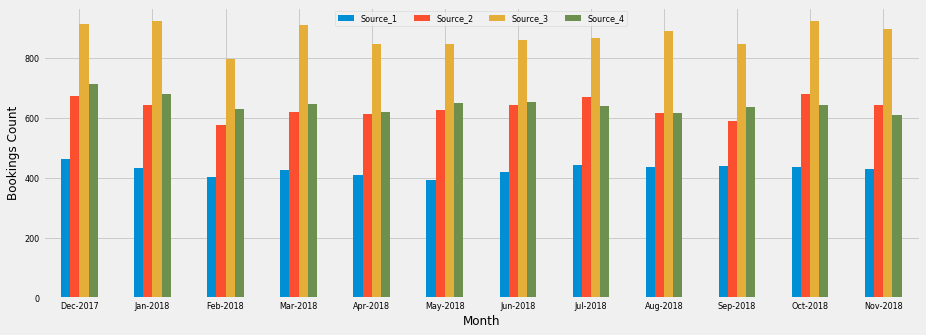

In [25]:
plt.style.use('fivethirtyeight')
ax=source.plot(x='mmm-yy', y=['Source_1',"Source_2","Source_3","Source_4"],kind='bar',figsize=(14,5),rot=0,fontsize=8)

ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Bookings Count',fontsize=12)
ax.legend(loc='upper center',ncol=4,fontsize=8);

# New Customer Acquisiton by Month

In [26]:
df1=pd.DataFrame(df.groupby('P_ID')['DOB'].min())
df1.reset_index(inplace=True)
df1.head()

,P_ID,DOB
0,1,2018-05-20
1,2,2018-11-10
2,3,2018-04-12
3,4,2018-03-02
4,5,2018-01-06


In [27]:
df2=pd.DataFrame(df1.groupby('DOB')['P_ID'].count())
df2.head()

,P_ID
DOB,
2017-12-01,187
2017-12-02,86
2017-12-03,84
2017-12-04,68
2017-12-05,85


In [28]:
new_customers_df=df2.resample(rule='M').sum()
new_customers_df.reset_index(inplace=True)

#adding month column 
new_customers_df['month']=new_customers_df['DOB'].apply(lambda x: x.month)


new_customers_df['month']=new_customers_df['month'].apply(lambda x: calendar.month_abbr[x])


#adding year
new_customers_df['year']=new_customers_df['DOB'].apply(lambda x: x.year)
#https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name

new_customers_df['mmm-yy']=new_customers_df['month'].astype(str)+'-'+new_customers_df['year'].astype(str)

new_customers_df.head()

,DOB,P_ID,month,year,mmm-yy
0,2017-12-31,2424,Dec,2017,Dec-2017
1,2018-01-31,1892,Jan,2018,Jan-2018
2,2018-02-28,1549,Feb,2018,Feb-2018
3,2018-03-31,1490,Mar,2018,Mar-2018
4,2018-04-30,1346,Apr,2018,Apr-2018


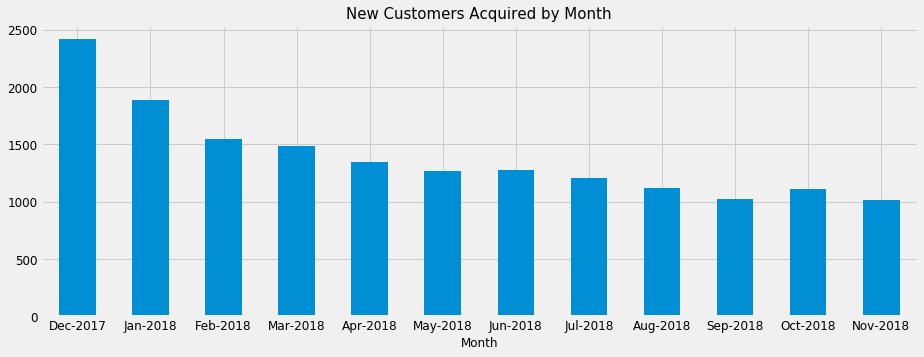

In [29]:
g=new_customers_df.plot(x="mmm-yy",y='P_ID',kind="bar",figsize=(14,5),legend=False,fontsize=12,rot=0,
                        yticks=np.arange(0,3000,step=500),grid=True)
g.set_xlabel('Month',size=12)
g.set_title('New Customers Acquired by Month',size=15);

# REPEAT RATES

In [30]:
#fetching 1st order details of customers 
first_order_df=df.loc[df.groupby("P_ID")["DOB"].idxmin()]
first_order_df.head()

,T_ID,P_ID,DOB,DOSR,Source,Slot
0,BBCHH,1,2018-05-20,2018-05-21,4,14
2,DYDMF,2,2018-11-10,2018-11-13,3,11
3,EZYSA,3,2018-04-12,2018-04-16,2,8
5,YRKFO,4,2018-03-02,2018-03-05,1,13
6,JSFWY,5,2018-01-06,2018-01-07,3,14


In [31]:
#second order details of customers
nonfirst_order_df= df.drop(index=first_order_df.index)
second_order_df=nonfirst_order_df.loc[nonfirst_order_df.groupby('P_ID')['DOB'].idxmin()]
second_order_df.head()

,T_ID,P_ID,DOB,DOSR,Source,Slot
1,CHWFD,1,2018-09-23,2018-09-23,3,8
4,HWAKX,3,2018-08-05,2018-08-06,2,11
10,LRPOS,8,2018-11-30,2018-11-30,3,14
17,PRFVG,14,2018-06-07,2018-06-07,4,6
26,UVFIY,18,2018-11-06,2018-11-07,3,13


In [32]:
#first & second orders details merged
first_second_order_df=pd.merge(first_order_df,second_order_df,how='left',on='P_ID', suffixes=('_first','_second'))
first_second_order_df.head()

,T_ID_first,P_ID,DOB_first,DOSR_first,Source_first,Slot_first,T_ID_second,DOB_second,DOSR_second,Source_second,Slot_second
0,BBCHH,1,2018-05-20,2018-05-21,4,14,CHWFD,2018-09-23,2018-09-23,3.0,8.0
1,DYDMF,2,2018-11-10,2018-11-13,3,11,NaN,NaT,NaT,NaN,NaN
2,EZYSA,3,2018-04-12,2018-04-16,2,8,HWAKX,2018-08-05,2018-08-06,2.0,11.0
3,YRKFO,4,2018-03-02,2018-03-05,1,13,NaN,NaT,NaT,NaN,NaN
4,JSFWY,5,2018-01-06,2018-01-07,3,14,NaN,NaT,NaT,NaN,NaN


In [33]:
first_second_order_df['difference']=first_second_order_df['DOB_second']-first_second_order_df['DOB_first']

In [34]:
first_second_order_df.head()

,T_ID_first,P_ID,DOB_first,DOSR_first,Source_first,Slot_first,T_ID_second,DOB_second,DOSR_second,Source_second,Slot_second,difference
0,BBCHH,1,2018-05-20,2018-05-21,4,14,CHWFD,2018-09-23,2018-09-23,3.0,8.0,126 days
1,DYDMF,2,2018-11-10,2018-11-13,3,11,NaN,NaT,NaT,NaN,NaN,NaT
2,EZYSA,3,2018-04-12,2018-04-16,2,8,HWAKX,2018-08-05,2018-08-06,2.0,11.0,115 days
3,YRKFO,4,2018-03-02,2018-03-05,1,13,NaN,NaT,NaT,NaN,NaN,NaT
4,JSFWY,5,2018-01-06,2018-01-07,3,14,NaN,NaT,NaT,NaN,NaN,NaT


In [35]:
#changing data type of differnce to int
first_second_order_df['difference']=first_second_order_df['difference'].astype('timedelta64[D]')
first_second_order_df.head(2)

#https://stackoverflow.com/questions/33605514/how-to-extract-days-as-integers-from-a-timedelta64ns-object-in-python

,T_ID_first,P_ID,DOB_first,DOSR_first,Source_first,Slot_first,T_ID_second,DOB_second,DOSR_second,Source_second,Slot_second,difference
0,BBCHH,1,2018-05-20,2018-05-21,4,14,CHWFD,2018-09-23,2018-09-23,3.0,8.0,126.0
1,DYDMF,2,2018-11-10,2018-11-13,3,11,NaN,NaT,NaT,NaN,NaN,NaN


In [36]:
difference_bins=[0,30,60,90,180,370]
cats=pd.cut(first_second_order_df['difference'],difference_bins,right=False)
first_second_order_df['difference_cat']=cats
first_second_order_df['difference_cat'].replace(np.nan,"not repeated",inplace=True)
first_second_order_df.head()

,T_ID_first,P_ID,DOB_first,DOSR_first,Source_first,Slot_first,T_ID_second,DOB_second,DOSR_second,Source_second,Slot_second,difference,difference_cat
0,BBCHH,1,2018-05-20,2018-05-21,4,14,CHWFD,2018-09-23,2018-09-23,3.0,8.0,126.0,"[90.0, 180.0)"
1,DYDMF,2,2018-11-10,2018-11-13,3,11,NaN,NaT,NaT,NaN,NaN,NaN,not repeated
2,EZYSA,3,2018-04-12,2018-04-16,2,8,HWAKX,2018-08-05,2018-08-06,2.0,11.0,115.0,"[90.0, 180.0)"
3,YRKFO,4,2018-03-02,2018-03-05,1,13,NaN,NaT,NaT,NaN,NaN,NaN,not repeated
4,JSFWY,5,2018-01-06,2018-01-07,3,14,NaN,NaT,NaT,NaN,NaN,NaN,not repeated


In [26]:
first_second_order_df['difference_cat'].value_counts()

not repeated      12020
[90.0, 180.0)      1250
[0.0, 30.0)        1230
[30.0, 60.0)        800
[180.0, 370.0)      771
[60.0, 90.0)        640
Name: difference_cat, dtype: int64

In [72]:
#changing to string for string operations
first_second_order_df['difference_cat']=first_second_order_df['difference_cat'].astype(str)

<b> 30 Days Repeat Rate

In [78]:
#fetching customers who are atleast 30 days old, so that repeat rate calculation is not influenced by customers<30 days old

atleast_30days_old_df =first_second_order_df[(df['DOB'].max()-first_second_order_df["DOB_first"]).astype('timedelta64[D]')>=30]


print("Within 30 Days Repeat Rate is :{} percent".
      format(round((atleast_30days_old_df['difference_cat']=="[0.0, 30.0)").sum()*100/atleast_30days_old_df['P_ID'].nunique()),3))

Within 30 Days Repeat Rate is :8.0 percent


<b> 60 Days Repeat Rate

In [80]:
atleast_60days_old_df =first_second_order_df[(df['DOB'].max()-first_second_order_df["DOB_first"]).astype('timedelta64[D]')>=60]

print("Within 60 Days Repeat Rate is :{} percent".
      format(round((atleast_60days_old_df['difference']<=60).sum()*100/atleast_60days_old_df['P_ID'].nunique()),3))

Within 60 Days Repeat Rate is :14.0 percent


<b> 90 Days Repeat Rate

In [81]:
atleast_90days_old_df =first_second_order_df[(df['DOB'].max()-first_second_order_df["DOB_first"]).astype('timedelta64[D]')>=90]

print("Within 90 Days Repeat Rate is :{} percent".
      format(round((atleast_90days_old_df['difference']<90.0).sum()*100/atleast_90days_old_df['P_ID'].nunique()),3))

Within 90 Days Repeat Rate is :19.0 percent


<b> 6 Months Repeat Rate

In [83]:
atleast_180days_old_df =first_second_order_df[(df['DOB'].max()-first_second_order_df["DOB_first"]).astype('timedelta64[D]')>=180]

print("Within 6 months Repeat Rate is :{} percent".
      format(round((atleast_180days_old_df['difference']<180.0).sum()*100/atleast_180days_old_df['P_ID'].nunique()),3))

Within 6 months Repeat Rate is :32.0 percent


**Non Repeating Customers Share**

In [99]:
print("Percent of customers who are atleast 30 days old and have not repeated once: {}".format(round(100-(atleast_30days_old_df['difference_cat']=="[0.0, 30.0)").sum()*100/atleast_30days_old_df['P_ID'].nunique()),2))
print("Percent of customers who are atleast 60 days old and have not repeated once: {}".format(round(100-(atleast_60days_old_df['difference']<=60).sum()*100/atleast_60days_old_df['P_ID'].nunique()),2))
print("Percent of customers who are atleast 90 days old and have not repeated once: {}".format(round(100-(atleast_90days_old_df['difference']<=90).sum()*100/atleast_90days_old_df['P_ID'].nunique()),2))
print("Percent of customers who are atleast 6 months old and have not repeated once: {}".format(round(100-(atleast_180days_old_df['difference']<=180).sum()*100/atleast_180days_old_df['P_ID'].nunique()),2))


Percent of customers who are atleast 30 days old and have not repeated once: 92.0
Percent of customers who are atleast 60 days old and have not repeated once: 86.0
Percent of customers who are atleast 90 days old and have not repeated once: 81.0
Percent of customers who are atleast 6 months old and have not repeated once: 68.0
